In [ ]:
# pip install -q seaborn

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

In [70]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [5]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

column_names = ['MPG','Cylinders','Displacement','Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)

df = raw_dataset.copy()

In [6]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [7]:
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [10]:
df.isna().sum()


MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [12]:
df = df.dropna()

In [14]:
origen_map = {1: 'USA', 2: 'Europa', 3: 'Japon'}

df['Origin'] = df['Origin'].map(origen_map)

C:\Users\marco\AppData\Local\Temp\ipykernel_30416\827687960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Origin'] = df['Origin'].map(origen_map)


In [17]:
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europa,Japon,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [18]:
train = df.sample(frac=0.8, random_state=18)
test = df.drop(train.index)

In [19]:
train.shape

(314, 10)

In [20]:
test.shape

(78, 10)

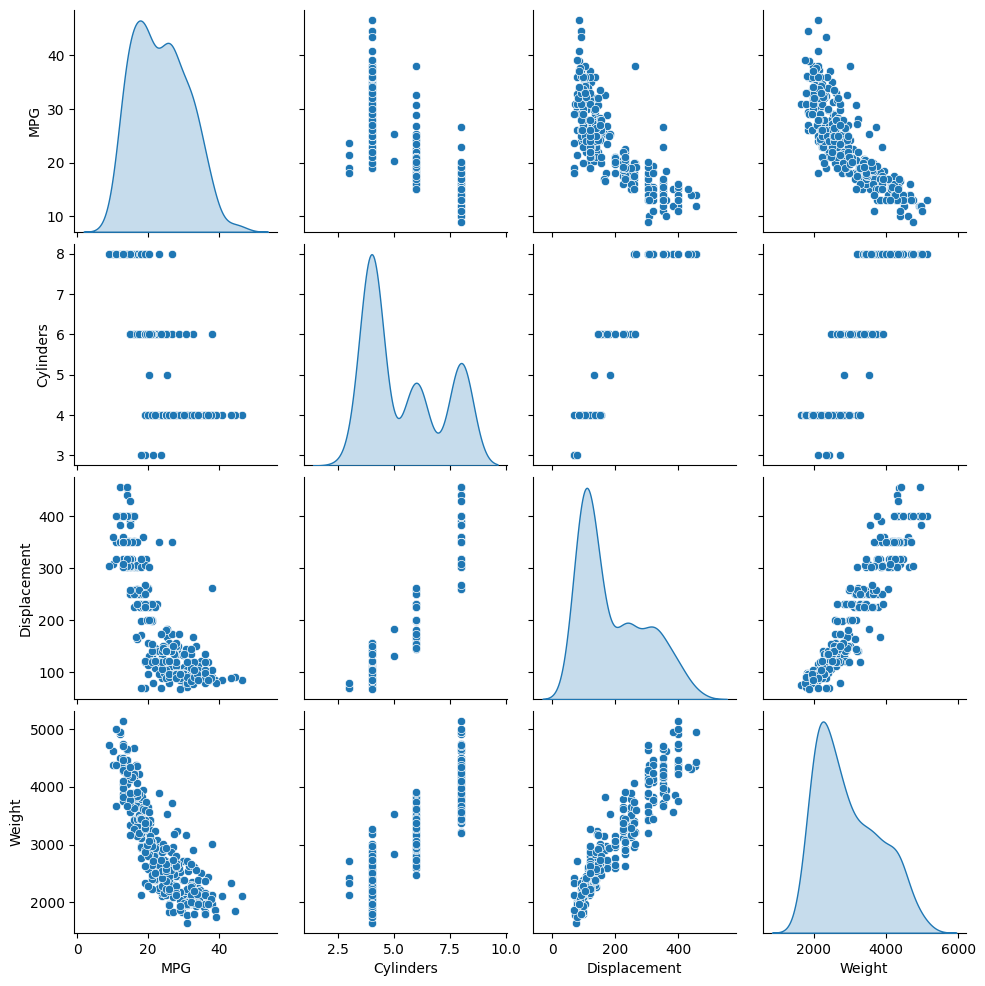

In [21]:
sns.pairplot(train[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [22]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.530255,7.584780,9.0,17.50,23.0,29.00,46.6
Cylinders,314.0,5.420382,1.703698,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,191.466561,103.994899,68.0,101.75,142.5,261.50,455.0
Horsepower,314.0,104.273885,38.083247,46.0,75.25,92.5,124.25,230.0
Weight,314.0,2955.512739,850.902844,1649.0,2220.75,2720.0,3627.50,5140.0
Acceleration,314.0,15.441083,2.683924,8.5,13.60,15.4,17.00,24.8
Model Year,314.0,75.952229,3.722946,70.0,73.00,76.0,79.00,82.0
Europa,314.0,0.165605,0.372319,0.0,0.00,0.0,0.00,1.0
Japon,314.0,0.216561,0.412558,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.617834,0.486692,0.0,0.00,1.0,1.00,1.0


In [27]:
train_features = train.copy()
test_features = test.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [30]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europa,Japon,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


### StandarScaler

$ z = \frac{x - \mu}{\sigma} $

In [35]:
# standar scaler
scaler = StandardScaler()

scaler.fit(train_features)

# print(scaler.mean_)

print(scaler.transform(train_features))

[[-0.83503617 -0.80388354 -0.27020501 ... -0.4455034   1.90201132
  -1.27148207]
 [-0.83503617 -0.77498993 -0.6384075  ... -0.4455034  -0.52575923
   0.78648376]
 [-0.83503617 -0.90982679 -0.42800608 ... -0.4455034   1.90201132
  -1.27148207]
 ...
 [ 0.34075467  0.679322   -0.50690661 ... -0.4455034  -0.52575923
   0.78648376]
 [ 1.5165455   1.11272622  0.67660139 ... -0.4455034  -0.52575923
   0.78648376]
 [-0.83503617 -0.38974173 -0.37540572 ... -0.4455034  -0.52575923
   0.78648376]]


### MinMaxScaler

$ z = \frac{x - min(x)}{max(x) - min(x)} $

In [37]:
minmax = MinMaxScaler()

minmax.fit(train_features)

print(minmax.transform(train_features))

[[0.2        0.10335917 0.26086957 ... 0.         1.         0.        ]
 [0.2        0.11111111 0.18478261 ... 0.         0.         1.        ]
 [0.2        0.0749354  0.22826087 ... 0.         1.         0.        ]
 ...
 [0.6        0.50129199 0.21195652 ... 0.         0.         1.        ]
 [1.         0.61757106 0.45652174 ... 0.         0.         1.        ]
 [0.2        0.21447028 0.23913043 ... 0.         0.         1.        ]]


### Normalizer



In [84]:
# normalizer = Normalizer()

# normalizer.fit(train_features)

# print(normalizer.transform(train_features))

# train_features = normalizer.transform(train_features)

# test_features = normalizer.transform(test_features)

[[0.00167751 0.04529284 0.03942154 ... 0.         0.00041938 0.        ]
 [0.0018512  0.05137066 0.0370239  ... 0.         0.         0.0004628 ]
 [0.00187334 0.0454285  0.04121348 ... 0.         0.00046834 0.        ]
 ...
 [0.00198103 0.08650519 0.02806466 ... 0.         0.         0.00033017]
 [0.00194543 0.07465588 0.03161324 ... 0.         0.         0.00024318]
 [0.00145883 0.05507066 0.03282357 ... 0.         0.         0.00036471]]


c:\Users\marco\anaconda3\envs\mii-dl2\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


In [101]:
normalizer = MinMaxScaler()

normalizer.fit(train_features)

print(normalizer.transform(train_features))

train_features = normalizer.transform(train_features)

test_features = normalizer.transform(test_features)

[[0.41740489 0.21088115 0.5740174  ... 0.         0.6933636  0.        ]
 [0.54317819 0.28893795 0.50118827 ... 0.         0.         0.83563934]
 [0.55921456 0.2126234  0.62844807 ... 0.         0.77430469 0.        ]
 ...
 [0.63720251 0.74016646 0.22904844 ... 0.         0.         0.5961665 ]
 [0.61141905 0.58798717 0.33683764 ... 0.         0.         0.43908877]
 [0.25904135 0.33645653 0.37360185 ... 0.         0.         0.65852156]]


In [102]:
train.describe().transpose()[['mean', 'std']]


,mean,std
MPG,23.530255,7.584780
Cylinders,5.420382,1.703698
Displacement,191.466561,103.994899
Horsepower,104.273885,38.083247
Weight,2955.512739,850.902844
Acceleration,15.441083,2.683924
Model Year,75.952229,3.722946
Europa,0.165605,0.372319
Japon,0.216561,0.412558
USA,0.617834,0.486692


In [103]:
inputs = keras.Input(shape=(9,))
outputs = layers.Dense(units=1)(inputs)
reg_model = tf.keras.Model(inputs, outputs)

reg_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 9)]               0         
                                                                 
 dense_27 (Dense)            (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [104]:
reg_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1), 
    loss="mean_squared_error"
    )

In [105]:
history = reg_model.fit(train_features, train_labels, epochs=500, validation_split=0.2, verbose=0)

c:\Users\marco\anaconda3\envs\mii-dl2\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


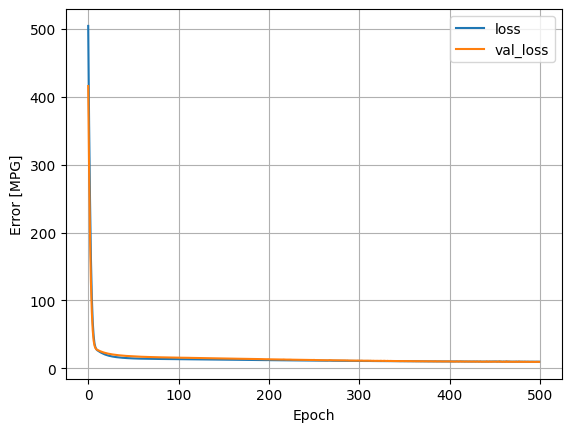

In [106]:
plot_loss(history)

In [107]:
reg_model.evaluate(test_features, test_labels, verbose=2)

3/3 - 0s - loss: 16.2174 - 98ms/epoch - 33ms/step


16.21744728088379

In [115]:
inputs = keras.Input(shape=(9,))
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
# x = layers.Dense(64, activation='relu')(x)
# x = layers.Dense(64, activation='relu')(x)
# x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1)(x)
reg_model = tf.keras.Model(inputs, outputs)

reg_model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 9)]               0         
                                                                 
 dense_34 (Dense)            (None, 64)                640       
                                                                 
 dense_35 (Dense)            (None, 64)                4160      
                                                                 
 dense_36 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [116]:
reg_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1), 
    loss="mean_squared_error"
    )

In [117]:
history = reg_model.fit(train_features, train_labels, epochs=100, validation_split=0.2, verbose=0)

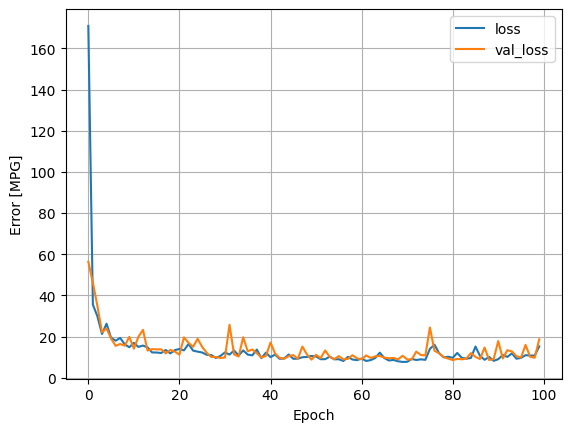

In [118]:
plot_loss(history)

In [119]:
reg_model.evaluate(test_features, test_labels, verbose=2)

3/3 - 0s - loss: 22.8945 - 173ms/epoch - 58ms/step


22.89447784423828

In [120]:
test_predictions = reg_model.predict(test_features).flatten()

3/3 [==============================] - 0s 3ms/step


In [122]:
normalizer.inverse_transform(test_features)

array([[2.20434110e-03, 9.36844968e-02, 4.40868220e-02, 9.94433380e-01,
        2.20434110e-03, 1.92879846e-02, 0.00000000e+00, 0.00000000e+00,
        2.75542638e-04],
       [2.55731908e-03, 1.45447522e-01, 7.19245990e-02, 9.86485834e-01,
        3.19664885e-03, 2.23765419e-02, 0.00000000e+00, 0.00000000e+00,
        3.19664885e-04],
       [1.68231845e-03, 4.75254961e-02, 3.99550631e-02, 9.97614839e-01,
        6.30869417e-03, 2.94405728e-02, 0.00000000e+00, 4.20579612e-04,
        0.00000000e+00],
       [2.11088469e-03, 6.96591949e-02, 3.34223410e-02, 9.96689389e-01,
        5.45311879e-03, 2.46269881e-02, 0.00000000e+00, 0.00000000e+00,
        3.51814116e-04],
       [1.49440313e-03, 4.10960860e-02, 3.25032680e-02, 9.98261289e-01,
        6.53801368e-03, 2.61520547e-02, 3.73600782e-04, 0.00000000e+00,
        0.00000000e+00],
       [1.81081666e-03, 7.54506941e-02, 2.65586443e-02, 9.96552768e-01,
        4.67794303e-03, 2.14279971e-02, 0.00000000e+00, 0.00000000e+00,
        3.0